In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_review (1).csv to bank_review (1).csv


In [ ]:
review_df = pd.read_csv('bank_review (1).csv')

In [ ]:
review_df.head(3)

,Unnamed: 0,Bank,Service,Rating,Review
0,0,ing-vysya-bank,\n\nConsumer Durable Loan,3.0,\n I've a savin...
1,1,ing-vysya-bank,\n\nConsumer Durable Loan,3.0,\n I hold a sav...
2,2,ing-vysya-bank,\n\nPersonal Loan,4.0,\n I have a exp...


In [ ]:
cleaned_Service = []
for service in review_df.Service:
  if service[0:1]== '\n' :
    service = service[2:]
  if service[0:1]== '\n' :
    service = service[2: ]
  cleaned_Service.append(service)

review_df['Service'] = cleaned_Service


In [ ]:
Services = []
Services = review_df.Service.unique()
Banks = []
Banks = review_df.Bank.unique()

In [ ]:
Services

array(['Consumer Durable Loan', 'Personal Loan', 'Credit Card',
       'Two Wheeler Loan', 'Current Account', 'Gold Loan',
       'Recurring Deposit', 'Other Loan', 'Mutual Fund', 'Fixed Deposit',
       'Education Loan', 'Car Loan', 'Home Loan', 'Saving Account',
       'All Products', 'Business Loan General', 'Loan Against Property',
       'Debit Card'], dtype=object)

In [ ]:
review_df.head(3)

,Unnamed: 0,Bank,Service,Rating,Review
0,0,ing-vysya-bank,Consumer Durable Loan,3.0,\n I've a savin...
1,1,ing-vysya-bank,Consumer Durable Loan,3.0,\n I hold a sav...
2,2,ing-vysya-bank,Personal Loan,4.0,\n I have a exp...


In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in review_df.Review: 
  val = str(val) 
  tokens = val.split() 
  for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
  comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

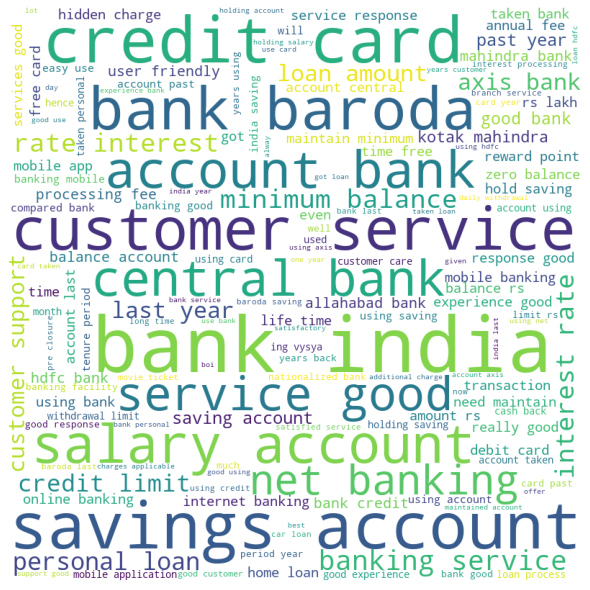

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9260 non-null   int64  
 1   Bank        9260 non-null   object 
 2   Service     9260 non-null   object 
 3   Rating      9260 non-null   float64
 4   Review      9260 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 361.8+ KB


In [ ]:
review_result = []
for val in review_df.Rating:
  if val == 5.0:
    review_result.append(2)
  elif val >= 4.0 and val < 5.0 :
    review_result.append(1)
  else:
    review_result.append(0)

review_df['Result'] = review_result

In [ ]:
review_df.Rating.value_counts()

5.0    4148
4.0    2633
3.0    1137
2.0     376
4.5     352
3.5     249
1.0     224
2.5      85
0.5      50
1.5       6
Name: Rating, dtype: int64

In [ ]:
review_df[review_df['Rating']==4.0].Review

2    \n                                I have a exp...
Name: Review, dtype: object

In [ ]:
review_df['Review'] = review_df['Review'].str.strip()

In [ ]:
review_df.head(3)

,Unnamed: 0,Bank,Service,Rating,Review,Result
0,0,ing-vysya-bank,Consumer Durable Loan,3.0,I've a savings account with the ING Vysya bank...,0
1,1,ing-vysya-bank,Consumer Durable Loan,3.0,I hold a saving account with ING VYSYA BANK an...,0
2,2,ing-vysya-bank,Personal Loan,4.0,I have a experience with ING Vysya. It was for...,1


In [ ]:
review_df.to_csv('bank_review.csv')

### Sentiment Analysis attempt

In [ ]:
!ls

bank.csv  sample_data


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Bidirectional, LSTM, Input
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
df = pd.read_csv('bank.csv')
df.iloc[:3]

,Unnamed: 0,Bank,Service,Rating,Review,sentiment
0,0,ing-vysya-bank,Other Loan,3.0,Earlier I had my savings account with ING Vysy...,0
1,1,ing-vysya-bank,Other Loan,3.0,I've a savings account with the ING Vysya bank...,0
2,2,ing-vysya-bank,Other Loan,4.0,Accessibility is lesser one for me with the IN...,1


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Bank          0
Service       0
Rating        0
Review        0
sentiment     0
dtype: int64

In [ ]:
df.shape

(2580, 6)

In [ ]:
df.sentiment.value_counts()

2    1087
1     870
0     623
Name: sentiment, dtype: int64

In [ ]:
df.Bank.value_counts()

idbi-bank                980
central-bank-of-india    700
idfc-bank                440
allahabad-bank           280
ing-vysya-bank           180
Name: Bank, dtype: int64

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
import string
punctuations = string.punctuation

First we clean up the text by lemmatizing the words and removing personal pronouns (in spaCy the lemmatized string of personal pronouns is '-PRON-'), stopwords, and punctuations.

In [ ]:
def cleanup_text(docs):
    texts = []
    for doc in docs:
        
        doc = nlp(doc, disable=['ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)

    return pd.Series(texts)

In [ ]:
data_cleaned = cleanup_text(df['Review'])

In [ ]:
data_cleaned[:1]

0    earlier saving account ing vysya average exper...
dtype: object

let's try training a word2vec model on all our text and creating custom word embeddings from that model. Word2Vec also benefits from having stopwords because they give context to the sentences. Therefore we will instead modify our above function "cleanup_text" and create a new function called "cleanup_text_word2vec" to not remove stopwords as well as include personal pronouns. Word2Vec expects a list of sentences where the sentences are lists of words so we will modify the function to do that as well.

In [ ]:
def clean_up_word2vec(docs): #cleans data as needed for word2vec model
  sentences = []
 
  for doc in docs:
    doc = nlp(doc, disable=['ner']) # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
 
    doc = " ".join([tok.lemma_.lower() for tok in doc if tok.lemma_ != '-PRON-'])
 
    doc = re.split("[\.?!;] ", doc) # Split into sentences based on punctuation
 
    doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc] #remove all punctuations
 
    doc = [sent.split() for sent in doc] # split to words
 
    sentences+=doc
  return sentences

In [ ]:
clean_text_data = clean_up_word2vec(df['Review'])

In [ ]:
len(clean_text_data) # count of sentences in 2580 reviews

10207

In [ ]:
clean_text_data[:10]

[['earlier', 'have', 'saving', 'account', 'with', 'ing', 'vysya'],
 ['be', 'a', 'average', 'experience'],
 ['the', 'customer', 'service', 'be', 'not', 'that', 'proactive'],
 ['need', 'to', 'be', 'more', 'responsive', 'too'],
 ['the',
  'online',
  'banking',
  'be',
  'also',
  'not',
  'friendly',
  'and',
  'could',
  'not',
  'complete',
  'transaction',
  'smoothly'],
 ['have', 'a', 'saving', 'account', 'with', 'the', 'ing', 'vysya', 'bank'],
 ['close',
  'the',
  'account',
  'customer',
  'support',
  'be',
  'not',
  'good',
  'and',
  'branch',
  'service',
  'be',
  'also',
  'not',
  'good'],
 ['now', 'be', 'change', 'to', 'a', 'different', 'bank'],
 ['accessibility',
  'be',
  'less',
  'one',
  'for',
  'with',
  'the',
  'ing',
  'vysya',
  'bank',
  'and',
  'have',
  'take',
  'the',
  'personal',
  'loan',
  'with',
  'for',
  'the',
  'huge',
  'rate',
  'of',
  'interest'],
 ['processing',
  'time',
  'be',
  'highlight',
  'aspect',
  'one',
  'with',
  'like',
  'be

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
word_2_vec = Word2Vec(clean_text_data, size=300, window=5, min_count=3, workers=4, sg=1)

In [ ]:
len(word_2_vec.wv.vocab)

1225

In [ ]:
len(word_2_vec.wv.vocab.keys())

1225

We no longer need train_cleaned_word2vec anymore because that was only for training the Word2Vec model. Now we can use the original train_cleaned variable that removed stopwords. The Word2Vec model can give us a 300 dimensional vector for individual words so we need a way to represent a text example that has multiple words in it in just 300 dimensions. One way of doing that is to average the word vectors for each word in a text example.

For intance (first training text cleaned): process afford mean ascertain dimension dungeon make circuit return point set aware fact perfectly uniform wall

We need to add up the word vectors for each word (process + afford + mean + ...) and divide by the number of words in this example (16). But if there is no word vector in our model for a given word then we ignore it.

In [ ]:
def average_vec(doc):
  average = np.zeros((300,), dtype='float32')
  num_words = 0
  for word in doc.split():
    if word in list(word_2_vec.wv.vocab.keys()):
       average = np.add(average, word_2_vec[word])
       num_words+=1

  if num_words!=0.:
    average = np.divide(average, num_words)
  return average

In [ ]:
train_cleaned_vec = np.zeros((df.shape[0],300), dtype='float32')

for i in range(len(data_cleaned)):
  train_cleaned_vec[i] = average_vec(data_cleaned[i])
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
train_cleaned_vec.shape

(2580, 300)

In [ ]:
y_one_hot = to_categorical(df['sentiment'], num_classes=3, dtype='int32')

In [ ]:
y_one_hot

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_cleaned_vec, y_one_hot, test_size=0.2, random_state=21)

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (2064, 300)
X_test size: (516, 300)
y_train size: (2064, 3)
y_test size: (516, 3)


In [ ]:
def build_model(architecture='LSTM'):
  #model = Sequential()
  if architecture=='CNN':
    # CONV-1D model
    inputs = Input(shape=(300,1))
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(inputs)
    #x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x, name='CNN')

  elif architecture=='LSTM':
    # BiDirectional LSTM
    inputs = Input(shape=(300,1))
    x = Bidirectional(LSTM(128, return_sequences=True), merge_mode='concat')(inputs)
    x = Dropout(0.2)(x) 
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x, name='LSTM')

  return model  

In [ ]:
model = build_model()

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print('Text train shape: ', X_train.shape)
print('Text test shape: ', X_test.shape)
model.summary()

Text train shape:  (2064, 300, 1)
Text test shape:  (516, 300, 1)
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 300, 1)]          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 300, 256)          133120    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300, 256)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4915264   
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
______________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
52/52 [==============================] - 2s 44ms/step - loss: 1.0847 - acc: 0.4119 - val_loss: 1.0602 - val_acc: 0.4455
Epoch 2/50
52/52 [==============================] - 2s 30ms/step - loss: 1.0790 - acc: 0.4107 - val_loss: 1.0654 - val_acc: 0.4455
Epoch 3/50
52/52 [==============================] - 2s 29ms/step - loss: 1.0800 - acc: 0.4167 - val_loss: 1.0690 - val_acc: 0.4455
Epoch 4/50
52/52 [==============================] - 2s 29ms/step - loss: 1.0786 - acc: 0.4161 - val_loss: 1.0658 - val_acc: 0.4455
Epoch 5/50
52/52 [==============================] - 2s 29ms/step - loss: 1.0782 - acc: 0.4161 - val_loss: 1.0647 - val_acc: 0.4455
Epoch 6/50
52/52 [==============================] - 2s 30ms/step - loss: 1.0781 - acc: 0.4161 - val_loss: 1.0627 - val_acc: 0.4455
Epoch 7/50
52/52 [==============================] - 2s 30ms/step - loss: 1.0766 - acc: 0.4161 - val_loss: 1.0684 - val_acc: 0.4455
Epoch 8/50
52/52 [==============================] - 2s 30ms/step - loss: 1.0780 - a

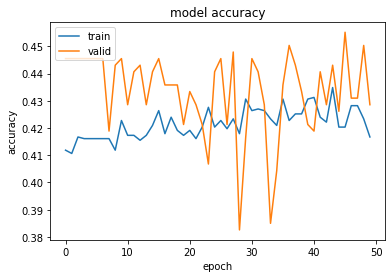

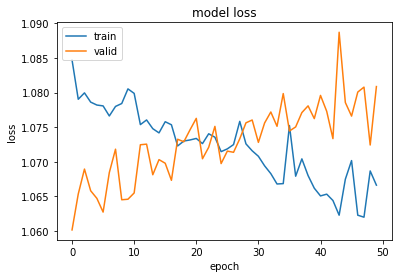

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.reset_orig()   # Reset seaborn settings to get rid of black background
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Plot model loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(X_test)
preds.shape

(516, 3)

In [ ]:
from sklearn.metrics import log_loss

log_loss(y_test, preds)

1.0836139925459558